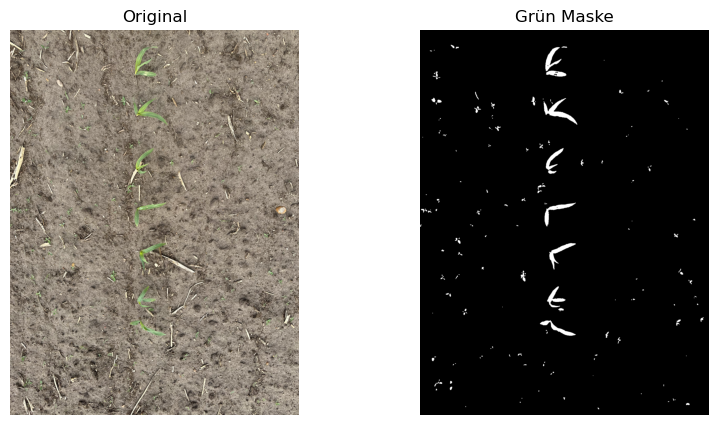

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def detect_plant_rows_with_rectangles(image_path):
    # Bild laden
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # In HSV umwandeln
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Grünbereich definieren (anpassen je nach Bild)
    lower_green = np.array([35, 40, 40])
    upper_green = np.array([85, 255, 255])
    mask_green = cv2.inRange(hsv, lower_green, upper_green)

    # Morphologische Filter (Rauschen entfernen)
    kernel = np.ones((5,5), np.uint8)
    mask_clean = cv2.morphologyEx(mask_green, cv2.MORPH_OPEN, kernel)
    mask_clean = cv2.morphologyEx(mask_clean, cv2.MORPH_CLOSE, kernel)

    # Konturen finden
    contours, _ = cv2.findContours(mask_clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Bild kopieren, um Rechtecke zu zeichnen
    img_rects = img_rgb.copy()

    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 500:  # Schwelle anpassen, um nur größere Bereiche zu berücksichtigen
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(img_rects, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blaues Rechteck

    # Ergebnisse anzeigen
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(img_rgb)
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title("Grün Maske")
    plt.imshow(mask_clean, cmap='gray')
    plt.axis('off')

    plt.show()

detect_plant_rows_with_rectangles('1_dataset/images/IMG_1050.png')
